# Stock Price Prediction using Artificial Neural Networks

### Final Project in Introduction to Data Science DAT541-1, Dec. 2020
### Group Name : Nordre Hafrsfjord Karsk Og TENNIS

Lars B. Lukerstuen (248800)

Joakim O. Gjermundstad ()

Martin Sommerli ()


# Introduction

The stock market is widely understood to be a complex system consisting of a large amount of factors which affect each other in complex ways. The inherrent complexity in the behaviour of the stock marked has become a source to a great endeavor, namely comming up with the model that can most accurately predict the movements of prices. After all, it is not difficult to see how it would be greatly advantageous to be able to predict stock (or any other asset) price movement ahead of ones competitor. In this endevour a great deal of techniques and methods have been created or lifted from the fields of computer science and statistics, and implemented in order to create more and more accurate models. One such technique is the use of Artificial Neural Networks (ANN), a category of algorithms which utilizes, and was initially inspired by, the arangement of neurons in the brains of living organisms. Essentially, these techniques involves creating a function which consists of a network of smaller functions, which ultimately, can be conceptualized as a network of nodes and vertices with individual weights and biases. These weights and biases are adjusted over prior data, which means that the funciton is trained on data (where we already know the sought output e.g prior accounts of stock prices and data available the day before). Hence, in principle, we would obtain a function that in given a set of data would ouptut a prediction. This in turn leads us to the subject of this projec, which is to implement ANN techniques in python in attempt to predict stock prices. 



### Neccessary packages 

In order to be able to run this project, a set of python libraries must be installed.
These libraries can be installed by uncommenting the code below and running. Note that we assume the reader already has installed python and anaconde with its most commonly included packages such as Pandas and Numpy.

In [5]:


#!pip install yfinance
#!pip install pytrends --upgrade
#!pip install --upgrade --user git+https://github.com/GeneralMills/pytrends
#!pip install git+https://github.com/Commonists/pageview-api.git

  Cloning https://github.com/Commonists/pageview-api.git to c:\users\lars\appdata\local\temp\pip-req-build-orral7e0
  Created wheel for pageviewapi: filename=pageviewapi-Undefined-py3-none-any.whl size=5345 sha256=90cdca961dda9943de45a05032c2685aae7b333eb686dd3f8ad90478dada4d9e
  Stored in directory: C:\Users\Lars\AppData\Local\Temp\pip-ephem-wheel-cache-lmiu0oyg\wheels\e8\3a\ac\a1a47ff2f5621ea13ecac16035f07c2c35ee2509404d828171
Successfully built pageviewapi


# Code

This section contains the code itself allong with explanations and comments outside and inside the segments of code themselves in order to explain what the segments and individual lines within the segments do. 

## Libraries
This segment import the relevant libraries

In [1]:
import yfinance as yf # eller bare pandas datareader?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sklearn
from pytrends.request import TrendReq
import pageviewapi as wik
pytrend = TrendReq()

#imports from sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.feature_selection import RFE
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn import svm



# Obtaining and Manipulating data

This section is dedicated to the process of collecting data for training the specific model

In [2]:
# # Google trends data

# def get_company_name(comp_name):
#     if len(comp_name) > 2:
#         return comp_name[0:1]
#     else:
#         return comp_name[0]

# keyword_list = [stock.info['shortName'], stock.info['symbol'], get_company_name(stock.info['shortName'].split(' '))]

# #pytrend.build_payload(kw_list=[keyword_list])

# trend = pytrend.get_historical_interest(keyword_list, year_start=2018, month_start=1, day_start=1, hour_start=0, year_end=2018, month_end=2, day_end=1, hour_end=0, cat=0, geo='', gprop='', sleep=0)
# plt.figure(figsize=(50,10))
# plt.plot(trend)
# trend

NameError: name 'stock' is not defined

Stochastic oscillator: 

\begin{equation}
\tag{1}
\% \mathrm{K}  = \frac{C -L14}{H14 -L14}
\end{equation}

Where $C =$ most recent closing price, $H14 =$ highest traded price for last 14 day period, and $L14 =$ lowest traded price for last 14 day period.   




Larry Williams %R indicator:

The Formula for the Williams %R Is:
\begin{aligned} &\text{Wiliams \%}R=\frac{\text{Highest High}-\text{Close}}{\text{Highest High}-\text{Lowest Low}}\\ &\textbf{where}\\ &\text{Highest High} = \text{Highest price in the lookback}\\ &\text{period, typically 14 days.}\\ &\text{Close} = \text{Most recent closing price.}\\ &\text{Lowest Low} = \text{Lowest price in the lookback}\\ &\text{period, typically 14 days.} \end{aligned} 
​	  
Wiliams %R= 
Highest High−Lowest Low
Highest High−Close
​	 
where
Highest High=Highest price in the lookback
period, typically 14 days.
Close=Most recent closing price.
Lowest Low=Lowest price in the lookback
period, typically 14 days.

### note that Stoch_osc = -LW_R_indicator  ???? Need not use both then


In [3]:
def datagetter(TICKER,  interval = '1d', start = '2017-01-01', end = '2020-10-20'):
    """Function that takes ticker, and name of firm as input and retrieves relevant data as pandas dataframe"""
    tick = yf.Ticker(TICKER)
    Name =tick.info['shortName']

    ### Section where data is from yahoo
    out_df= tick.history(interval = interval,  start=start, end=end)[['Open','Close']]
    
    ##Williams %R indicator
    williams = out_df['Close'].rolling(14).apply(lambda x: (x.max() -x[-1])/(x.max()- x.min()))
    out_df['williams_R'] = williams
    
    ### wikipedia data
    wikistart = start.replace('-','')
    wikiend = end.replace('-','')
    try:
        wikidata = wik.per_article('en.wikipedia', Name, wikistart, wikiend,access='all-access', agent='all-agents', granularity='daily')
        df_wiki = pd.DataFrame(wikidata['items'])
        df_wiki['timestamp'] = pd.to_datetime(df_wiki['timestamp'], format = '%Y%m%d%H')
        df_wiki.set_index('timestamp', inplace = True)
        out_df['wikiviews'] = df_wiki['views']
    except:
        print('fungerte ikke')
    
    ### Google trends

    return out_df.dropna() #drops nan values, at least 14 drops because of williams R is computed by 14day rolling window, nan for first days

apple_data = datagetter('AAPL')

print(apple_data)




                  Open       Close  williams_R  wikiviews
Date                                                     
2017-01-23   28.181802   28.200590    0.000000      13894
2017-01-24   28.076121   28.174757    0.027093      14157
2017-01-25   28.280436   28.623314    0.000000      13459
2017-01-26   28.573997   28.637407    0.000000      13543
2017-01-27   28.684377   28.639755    0.000000      11873
...                ...         ...         ...        ...
2020-10-13  125.054250  120.891434    0.203956      29580
2020-10-14  120.791602  120.981277    0.264852      28546
2020-10-15  118.515535  120.502106    0.324253      21728
2020-10-16  121.071120  118.815010    0.472760      21000
2020-10-19  119.753392  115.780251    0.739895      17900

[943 rows x 4 columns]


# Joakim Code

In [4]:
stock_data = apple_data[['Open','Close']]
wiki_data = apple_data[["wikiviews"]]

print(stock_data, wiki_data)

                  Open       Close
Date                              
2017-01-23   28.181802   28.200590
2017-01-24   28.076121   28.174757
2017-01-25   28.280436   28.623314
2017-01-26   28.573997   28.637407
2017-01-27   28.684377   28.639755
...                ...         ...
2020-10-13  125.054250  120.891434
2020-10-14  120.791602  120.981277
2020-10-15  118.515535  120.502106
2020-10-16  121.071120  118.815010
2020-10-19  119.753392  115.780251

[943 rows x 2 columns]             wikiviews
Date                 
2017-01-23      13894
2017-01-24      14157
2017-01-25      13459
2017-01-26      13543
2017-01-27      11873
...               ...
2020-10-13      29580
2020-10-14      28546
2020-10-15      21728
2020-10-16      21000
2020-10-19      17900

[943 rows x 1 columns]


In [5]:
#Må legge til ein funksjon for williams, og legge til google data

def Indicator_Calculation(stock_data, wiki_data):

    df_stock = stock_data
    df_wiki = wiki_data
    out_df = pd.concat([stock_data, wiki_data], axis = 1)

    def RSI(data, time_window):
        diff = data.diff(1).dropna()

        up_change = 0 * diff
        down_change = 0 * diff

        up_change[diff > 0] = diff[diff > 0]
        down_change[diff < 0] = diff[diff < 0]

        up_change_avg = up_change.ewm(com = time_window-1, min_periods = time_window).mean()
        down_change_avg = down_change.ewm(com = time_window-1, min_periods = time_window).mean()

        rs = abs(up_change_avg/down_change_avg)
        rsi = 100 - 100/(1+rs)
        return rsi
    out_df["RSI"] = RSI(df_stock["Close"], 14)
    out_df["Wiki RSI"] = RSI(df_wiki["wikiviews"], 14)

    def Moving_Average(data, time_window):
        data_rolling = data.rolling(window= time_window).mean()
        return data_rolling
    out_df["Moving Average"] = Moving_Average(df_stock["Close"], 3)
    out_df["Wiki MA"] = Moving_Average(df_wiki["wikiviews"], 14)

    def EMA(data):
        ema = data.ewm(span= 3, adjust=False).mean()       #https://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html#stats-moments-exponentially-weighted

        return ema
    out_df["EMA"] = EMA(df_stock["Close"])
    out_df["Wiki EMA"] = EMA(df_wiki["wikiviews"])

    def Disparity(data, data_shift):
        disparity = (data/data_shift)*100
        return disparity
    out_df["Disparity"] = Disparity(df_stock["Close"], out_df["Moving Average"])
    out_df["Wiki Dis"] = Disparity(df_wiki["wikiviews"], out_df["Wiki MA"]) 

    def Momentum_1(data, data_shifted):
        momentum1 = (data/data_shifted)*100
        return momentum1
    out_df["Momentum_1"] = Momentum_1(df_stock["Close"], df_stock["Close"].shift(5))
    out_df["Wiki Mom_1"] = Momentum_1(df_wiki["wikiviews"], df_wiki["wikiviews"].shift(5))

    def Momentum_2(data, data_shifted):
        momentum2 = (data-data_shifted)*100
        return momentum2 
    out_df["Momentum_2"] = Momentum_2(df_stock["Close"], df_stock["Close"].shift(5))
    out_df["Wiki Mom_2"] = Momentum_2(df_wiki["wikiviews"], df_wiki["wikiviews"].shift(5))

    def Rate_Of_Change(data, momentum2):
        ROC = (data/momentum2)*100
        return ROC 
    out_df["ROC"] = Rate_Of_Change(df_stock["Close"], out_df["Momentum_2"])
    out_df["Wiki ROC"] = Rate_Of_Change(df_wiki["wikiviews"], out_df["Wiki Mom_2"])
    return out_df.dropna()


all_data = Indicator_Calculation(stock_data, wiki_data)

all_data.tail(10)


,Open,Close,wikiviews,RSI,Wiki RSI,Moving Average,Wiki MA,EMA,Wiki EMA,Disparity,Wiki Dis,Momentum_1,Wiki Mom_1,Momentum_2,Wiki Mom_2,ROC,Wiki ROC
Date,,,,,,,,,,,,,,,,,
2020-10-06,115.500729,112.965111,13651,48.765360,47.151250,114.029938,14301.071429,114.097624,13715.766926,99.066186,95.454387,99.184861,101.926379,-92.839050,25800.0,-121.678443,52.910853
2020-10-07,114.422599,114.881805,16924,51.379107,53.366491,114.715424,14288.071429,114.489715,15319.883463,100.145039,118.448456,99.369662,133.291329,-72.873688,422700.0,-157.645110,4.003785
2020-10-08,116.049782,114.771988,15987,51.217885,51.499242,114.206301,14318.214286,114.630851,15653.441732,100.495320,111.654985,98.441642,132.463336,-181.687164,391800.0,-63.170114,4.080398
2020-10-09,115.081455,116.768547,16534,54.041463,52.543156,115.474113,14346.428571,115.699699,16093.720866,101.120973,115.248195,103.494959,144.768409,394.319916,511300.0,29.612643,3.233718
2020-10-12,119.853223,124.185753,17110,62.682963,53.673895,118.575429,14484.928571,119.942726,16601.860433,104.731439,118.122778,106.781120,110.124220,788.639832,157300.0,15.746827,10.877305
2020-10-13,125.054250,120.891434,29580,57.510689,70.218061,120.615245,15462.857143,120.417080,23090.930216,100.228984,191.297118,107.016611,216.687422,792.632294,1592900.0,15.251894,1.856990
2020-10-14,120.791602,120.981277,28546,57.613412,68.047994,122.019488,16494.000000,120.699179,25818.465108,99.149144,173.068995,105.309346,168.671709,609.947205,1162200.0,19.834713,2.456204
2020-10-15,118.515535,120.502106,21728,56.824351,55.801972,120.791606,17035.142857,120.600642,23773.232554,99.760331,127.548094,104.992610,135.910427,573.011780,574100.0,21.029604,3.784706
2020-10-16,121.071120,118.815010,21000,54.019129,54.670632,120.099464,17584.071429,119.707826,22386.616277,98.930508,119.426266,101.752581,127.011008,204.646301,446600.0,58.058714,4.702194


# Variable selection methods
Once Data is collected we perform feature selection in order to minimize the amount of training data. This is to somewhat optimize the application as larger datasets need more processing and that some data might not be as useful to describe the desired output.  




## Correlation Matrix
Easily found with pandas, the correlation matrix expresses the correlations between the data. If we were to analyse the correlation between the datapoint with different lags in time, then we can use this as aid to select the most important features.

In [13]:
#correlation matrix
corrs_lars = apple_data.corr()
corrs_joakim = all_data.corr()

print(corrs_joakim) 


                    Open     Close  wikiviews       RSI  Wiki RSI  \
Open            1.000000  0.998920   0.327623  0.176598  0.077906   
Close           0.998920  1.000000   0.326510  0.184492  0.077019   
wikiviews       0.327623  0.326510   1.000000  0.055305  0.763761   
RSI             0.176598  0.184492   0.055305  1.000000  0.038574   
Wiki RSI        0.077906  0.077019   0.763761  0.038574  1.000000   
Moving Average  0.999163  0.999002   0.325896  0.169304  0.075014   
Wiki MA         0.443311  0.442120   0.589871  0.027549  0.086074   
EMA             0.999274  0.999410   0.325876  0.170275  0.075105   
Wiki EMA        0.384695  0.383231   0.927132  0.055718  0.592300   
Disparity       0.063402  0.089151   0.046800  0.409973  0.072668   
Wiki Dis        0.049190  0.048830   0.761805  0.049825  0.905511   
Momentum_1      0.152139  0.165629   0.075300  0.612326  0.089197   
Wiki Mom_1      0.056441  0.055423   0.701595  0.033010  0.772180   
Momentum_2      0.219006  0.233841



## Principal component analysis:
Common method to reduce dimensinality of prediction/training data for predictive models. 
PCA can be broken down into the following steps: 

1) Standarization
(Z-score)

2) Compute Covariance Matrix

3) Compute Eigen-vectors of covariance matrix.
The eigen vectors can be interpeted as the principal components e.g the combinations of features which maximise variance, and the eigen value corresponds to the amount of total variance carried in each principal component. Hence we can rank the principal components in the order of highest eigenvalue

4) Find feature vectors.
The feature vectors is a matrix conisting of the eigen vectors of the components we decide to keep in decending order. 

5) Obtain the new "better suited" data:
The new data is obtained by matrix multtiplication
\begin{equation}
NewData = featureVector^{T} \cdot NormalizedOldData^{T}
\end{equation}

[[-1.92312770e+00 -1.45282036e-01 -1.69875237e+00 ...  7.63613323e-02
   3.56749768e-03 -5.17376909e-03]
 [-1.41417643e+00  4.27376724e-01 -1.88749310e+00 ...  2.53283413e-02
   2.04264446e-03 -6.23139887e-04]
 [-1.37993970e+00  2.75647475e-01 -2.16968661e+00 ...  1.94721422e-02
  -5.34112629e-03  5.51428917e-03]
 ...
 [ 7.98982997e+00 -1.56151947e+00  7.23869313e-01 ...  2.83787938e-02
  -1.01872590e-01  2.37416191e-02]
 [ 7.09704351e+00 -1.87507451e+00  2.16629027e+00 ...  4.55799597e-03
   4.60006504e-02  2.70123302e-02]
 [ 4.57413259e+00 -2.66082724e+00  5.60186875e+00 ...  7.80940298e-02
   8.89480479e-02  9.77851329e-03]]


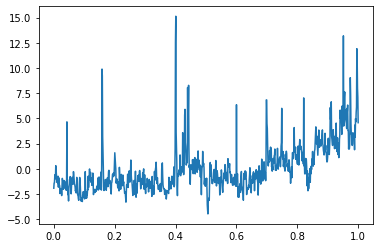

In [49]:
# pca_test_data = normalize(all_data) #Normalizer scales row-wise, Not sure if neccessary

scaler_for_pca = StandardScaler() #StandardScaler scales columnwise
scaler_for_pca.fit(all_data)
pca_data = scaler_for_pca.transform(all_data)


pca = PCA(n_components='mle', svd_solver='full')
pca.fit(pca_data)
dimension_reduced_data = pca.transform(pca_test_data)
print(dimension_reduced_data)

fig2, axz = plt.subplots()
axz.plot(np.linspace(0,1, num =929),dimension_reduced_data[:,0])

## RFE, Recursive Feature elimination
 Another approach to feature selection

In [10]:
from sklearn.datasets import make_friedman1
from sklearn.svm import SVR

rfe_test_data = apple_data.copy()


test_rfe_X = rfe_test_data[:-1]
test_rfe_y = rfe_test_data['Open'].shift(-1)
test_rfe_y =test_rfe_y.dropna()

estimator = MLPRegressor()
estimator2 = svm.SVR(gamma = 'auto')
#selector = RFE(estimator, n_features_to_select=3, step=1) #MLP does not work with RFE
selector2 = RFE(estimator2, n_features_to_select = 3, step =1) #Does not work either
selector2 = selector2.fit(test_rfe_X, test_rfe_y)
#selector.support_




RuntimeError: The classifier does not expose "coef_" or "feature_importances_" attributes

Date
2017-01-23     28.076121
2017-01-24     28.280436
2017-01-25     28.573997
2017-01-26     28.684377
2017-01-27     28.400213
                 ...    
2020-10-12    125.054250
2020-10-13    120.791602
2020-10-14    118.515535
2020-10-15    121.071120
2020-10-16    119.753392
Name: Open, Length: 942, dtype: float64


# Multi-Layered Perceptron Regressor

Class MLPClassifier and MPLRegressor implements a multi-layer perceptron (MLP) algorithm that trains using Backpropagation.

MLP trains on two arrays: array X of size (n_samples, n_features), which holds the training samples represented as floating point feature vectors; and array y of size (n_samples,), which holds the target values (class labels) for the training samples:

In [71]:
### First without Scaling/standardizing data
raw_data =all_data.copy()

y_tr = raw_data['Open'].shift(-1) 
raw_y = np.array(y_tr.dropna())
raw_X = np.array(raw_data[:-1]) #dropping last value since since target data contains one less row 

raw_X_train, raw_X_test, raw_y_train, raw_y_test = train_test_split(raw_X, raw_y,random_state=1, test_size =0.2)
raw_regr = MLPRegressor(random_state=1, max_iter=500).fit(raw_X_train, raw_y_train)

raw_prediction =raw_regr.predict(raw_data)


#With scaled/standardized values dime
y_scaler = StandardScaler()
y_scaler.fit(raw_y.reshape(-1,1))
scaled_y = y_scaler.transform(raw_y.reshape(-1,1))

X_scaler = StandardScaler()
X_scaler.fit(all_data)
scaled_X = X_scaler.transform(all_data)
   

scaled_X_train, scaled_X_test, scaled_y_train, scaled_y_test = train_test_split(scaled_X[:-1], scaled_y,random_state=1, test_size =0.2)
scaled_regr = MLPRegressor(random_state =1, max_iter=500).fit(scaled_X_train,scaled_y_train)

scaled_prediction = scaled_regr.predict(scaled_X)

#With dimension reduced data from PCA
reduced_data = dimension_reduced_data.copy()

y_scaler = StandardScaler()
y_scaler.fit(raw_y.reshape(-1,1))
reduced_y = scaled_y                    #Same y as above applies
reduced_X = np.array(reduced_data[:-1])           #using the previously scaled data, this should be cleaned to be a little neater

reduced_X_train, reduced_X_test, reduced_y_train, reduced_y_test = train_test_split(reduced_X, reduced_y,random_state=1, test_size =0.2)
reduced_regr = MLPRegressor(random_state =1, max_iter=500).fit(reduced_X_train,reduced_y_train)

reduced_prediction = reduced_regr.predict(reduced_X)


print(raw_prediction[-2], scaled_prediction[-2], reduced_prediction[-2])

-363.51435914505385 2.91047825711991 3.125862868088936


In [78]:
print(scaled_X.shape, scal)

(929, 17)


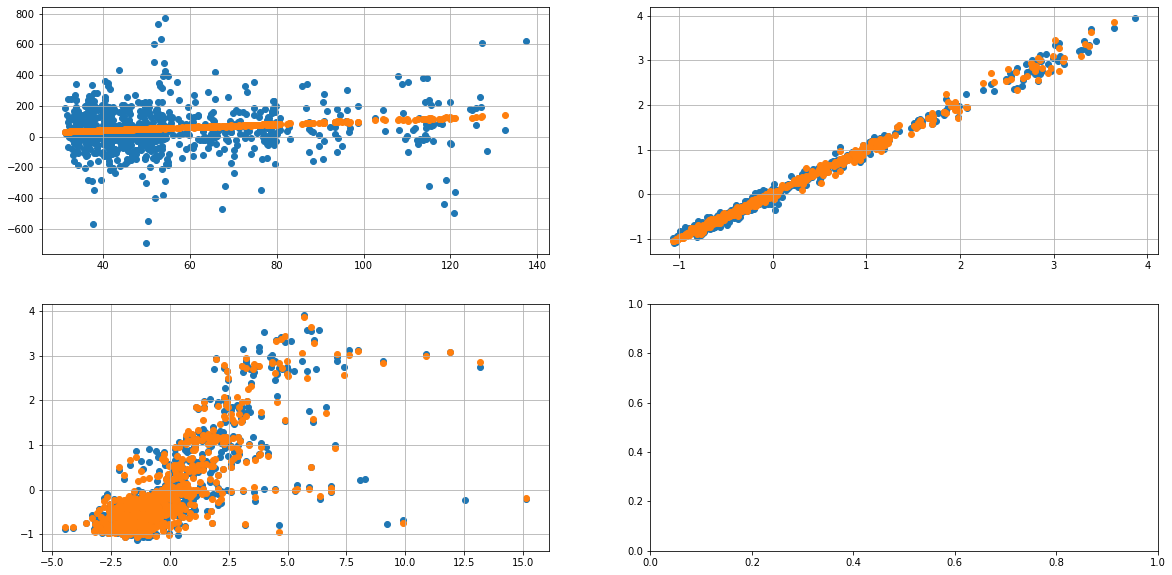

In [82]:
### Plotting Tests

testfig, axes = plt.subplots(2,2, figsize = (20,10))
axes[0][0].scatter(raw_X[:,0], raw_prediction[:-1], label = 'Scaled ')
axes[0][0].scatter(raw_X_train[:,0],raw_y_train)
axes[0][1].scatter(scaled_X[:,0], scaled_prediction)
axes[0][1].scatter(scaled_X_train[:,0], scaled_y_train)
axes[1][0].scatter(reduced_X[:,0], reduced_prediction)
axes[1][0].scatter(reduced_X_train[:,0], reduced_y_train)

axes[1][0].grid()
axes[0][0].grid()
axes[0][1].grid()

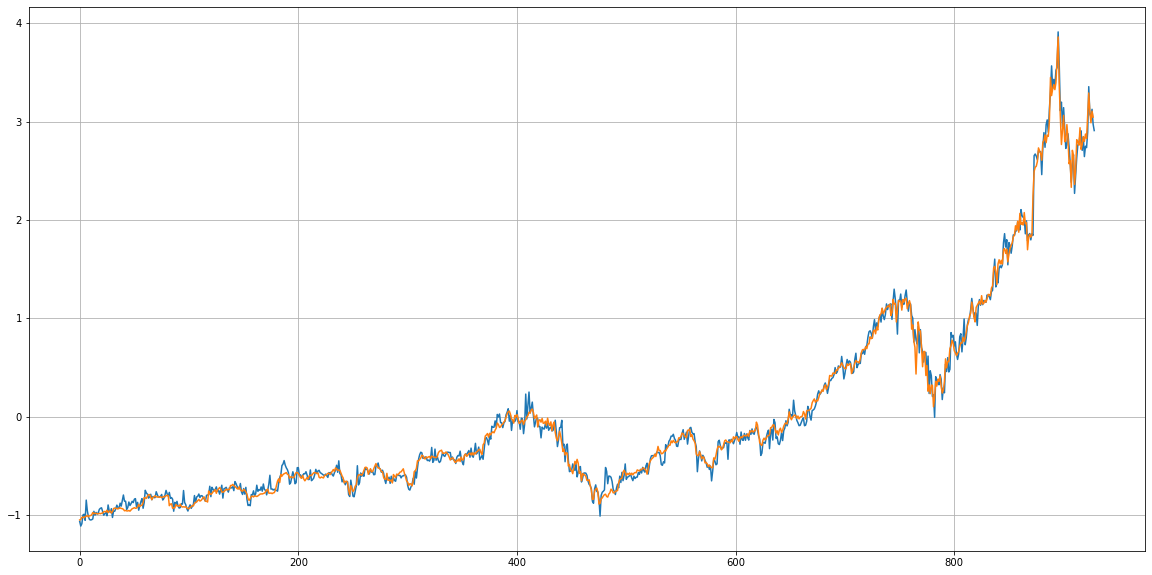

In [97]:
### Timeplots

prediction_over_t = reduced_regr.predict(reduced_data)


timeplot, tmax = plt.subplots(figsize = (20,10))
tmax.plot(np.arange(0,len(prediction_over_t)),prediction_over_t)
tmax.plot(np.arange(0,len(scaled_y)),scaled_y)
tmax.grid()



# Support Vector Machines (SVM)

In [63]:
raw_regr = svm.SVR(gamma = 'auto')
raw_regr.fit(raw_X_train, raw_y_train)
raw_regr.predict(raw_X_test[-1].reshape(1,-1))



array([45.88825737])

In [62]:
scaled_regre = svm.SVR(gamma='auto')
scaled_regr.fit(scaled_X_train, scaled_y_train.ravel())
scaled_regr.predict(scaled_X_test[-1].reshape(1,-1))

array([-0.31111251])